---
INTEGRANTES:
- Alonso Maurel
- Monserrath Morales


TEMA SELECCIONADO:
* Consumo per cápita de diferentes tipos de carne por país desde el año 1961 al 2022.

Este estudio busca descubrir patrones de consumo de carne en distintos países, explorando cómo han evolucionado a lo largo del tiempo. Para ello, se aplicarán técnicas de agrupamiento no supervisado, como K-Means y DBSCAN. Se trabajará con variables seleccionadas que destacan por su diversidad entre regiones y su potencial para revelar diferencias culturales y geográficas en los hábitos alimentarios.

DATASET:
* https://ourworldindata.org/grapher/per-capita-meat-type?time=latest&country=CHN~USA~IND~ARG~PRT~ETH~JPN~GBR~BRA

---


In [ ]:
pip install numpy pandas matplotlib scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df_data = pd.read_csv("https://drive.google.com/uc?export=download&id=1KUIExtxf5nofNTI8IpPW-oQVu3ZAmbzn")
df_data.head()

Entity Code  Year  \
0  Afghanistan  AFG  1961   
1  Afghanistan  AFG  1962   
2  Afghanistan  AFG  1963   
3  Afghanistan  AFG  1964   
4  Afghanistan  AFG  1965   

   Meat, poultry | 00002734 || Food available for consumption | 0645pc || kilograms per year per capita  \
0                                           0.612220                                                      
1                                           0.641587                                                      
2                                           0.641828                                                      
3                                           0.651754                                                      
4                                           0.681102                                                      

   Meat, beef and buffalo | 00002731 || Food available for consumption | 0645pc || kilograms per year per capita  \
0                                           4.664536                                                               
1                                           4.870231                                                               
2                                           4.920679                                                               
3                                           4.893021                                                               
4                                           4.855283                                                               

   Meat, sheep and goat | 00002732 || Food available for consumption | 0645pc || kilograms per year per capita  \
0                                           7.949147                                                             
1                                           7.699047                                                             
2                                           7.867252                                                             
3                                           8.122609                                                             
4                                           8.406744                                                             

   Meat, pig | 00002733 || Food available for consumption | 0645pc || kilograms per year per capita  \
0                                                NaN                                                  
1                                                NaN                                                  
2                                                NaN                                                  
3                                                NaN                                                  
4                                                NaN                                                  

   Meat, Other | 00002735 || Food available for consumption | 0645pc || kilograms per year per capita  \
0                                           0.826012                                                    
1                                           0.855450                                                    
2                                           1.040539                                                    
3                                           0.982495                                                    
4                                           1.031383                                                    

   Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita  
0                                           0.029153                                                        
1                                           0.029163                                                        
2                                           0.029174                                                        
3                                           0.029183                                                        
4            

# Análisis exploratorio de datos (EDA)

In [ ]:
df_data.columns

# renombrar columnas usando un diccionario
new_columns = {
    'Entity': 'Entity',
    'Code': 'Code',
    'Year': 'Year',
    'Meat, pig | 00002733 || Food available for consumption | 0645pc || kilograms per year per capita': 'Pigmeat (kg per capita per year)',
    'Meat, poultry | 00002734 || Food available for consumption | 0645pc || kilograms per year per capita': 'Poultry Meat (kg per capita per year)',
    'Meat, beef and buffalo | 00002731 || Food available for consumption | 0645pc || kilograms per year per capita': 'Beef and Buffalo Meat (kg per capita per year)',
    'Meat, sheep and goat | 00002732 || Food available for consumption | 0645pc || kilograms per year per capita': 'Sheep and Goat Meat (kg per capita per year)',
    'Meat, Other | 00002735 || Food available for consumption | 0645pc || kilograms per year per capita': 'Other Meat (kg per capita per year)',
    'Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita': 'Fish and Seafood (kg per capita per year)'
}

df_data.rename(columns=new_columns, inplace=True)
df_data.head(5)

Entity Code  Year  Poultry Meat (kg per capita per year)  \
0  Afghanistan  AFG  1961                               0.612220   
1  Afghanistan  AFG  1962                               0.641587   
2  Afghanistan  AFG  1963                               0.641828   
3  Afghanistan  AFG  1964                               0.651754   
4  Afghanistan  AFG  1965                               0.681102   

   Beef and Buffalo Meat (kg per capita per year)  \
0                                        4.664536   
1                                        4.870231   
2                                        4.920679   
3                                        4.893021   
4                                        4.855283   

   Sheep and Goat Meat (kg per capita per year)  \
0                                      7.949147   
1                                      7.699047   
2                                      7.867252   
3                                      8.122609   
4                                      8.406744   

   Pigmeat (kg per capita per year)  Other Meat (kg per capita per year)  \
0                               NaN                             0.826012   
1                               NaN                             0.855450   
2                               NaN                             1.040539   
3                               NaN                             0.982495   
4                               NaN                             1.031383   

   Fish and Seafood (kg per capita per year)  
0                                   0.029153  
1                                   0.029163  
2                                   0.029174  
3                                   0.029183  
4                                   0.029190

In [ ]:
# analizar tipos, valores nulos y tendencia central, dispersión y forma de distribución del dataset
print(df_data.shape)
print(df_data.info())
print(df_data.isnull().sum())
df_data.describe()

(12877, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12877 entries, 0 to 12876
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          12877 non-null  object 
 1   Code                                            10216 non-null  object 
 2   Year                                            12877 non-null  int64  
 3   Poultry Meat (kg per capita per year)           12877 non-null  float64
 4   Beef and Buffalo Meat (kg per capita per year)  12876 non-null  float64
 5   Sheep and Goat Meat (kg per capita per year)    12877 non-null  float64
 6   Pigmeat (kg per capita per year)                12586 non-null  float64
 7   Other Meat (kg per capita per year)             12874 non-null  float64
 8   Fish and Seafood (kg per capita per year)       12876 non-null  float64
dtypes: float64(6), int64(1), obje

Year  Poultry Meat (kg per capita per year)  \
count  12877.000000                           12877.000000   
mean    1992.540732                              12.583109   
std       17.955642                              13.714867   
min     1961.000000                               0.000000   
25%     1977.000000                               2.104565   
50%     1993.000000                               7.460000   
75%     2008.000000                              18.767815   
max     2022.000000                             120.869835   

       Beef and Buffalo Meat (kg per capita per year)  \
count                                    12876.000000   
mean                                        12.272712   
std                                         11.386524   
min                                          0.000000   
25%                                          4.405438   
50%                                          8.230548   
75%                                         17.597181   
max                                         92.725235   

       Sheep and Goat Meat (kg per capita per year)  \
count                                  12877.000000   
mean                                       3.376247   
std                                        6.241292   
min                                        0.000000   
25%                                        0.578138   
50%                                        1.417080   
75%                                        3.471019   
max                                       68.700650   

       Pigmeat (kg per capita per year)  Other Meat (kg per capita per year)  \
count                      12586.000000                         12874.000000   
mean                          12.170080                             1.822011   
std                           14.380394                             4.201109   
min                            0.000000                             0.000000   
25%                            1.157392                             0.167213   
50%                            5.997257                             0.780000   
75%                           19.086834                             1.850000   
max                           77.979744                            70.196640   

       Fish and Seafood (kg per capita per year)  
count                               12876.000000  
mean                                   16.479633  
std                                    16.260755  
min                                     0.000000  
25%                                     5.749880  
50%                                    12.069506  
75%                                    22.281732  
max                                   183.656700

1. Imputar valores nulos por la mediana según corresponda y eliminar columnas de no interés.

In [ ]:
# imputar Pigmeat, Beef and Buffalo, Other Meat y Fish and Seafood por la mediana
cols_mediana = [
    "Pigmeat (kg per capita per year)",
    "Beef and Buffalo Meat (kg per capita per year)",
    "Other Meat (kg per capita per year)",
    "Fish and Seafood (kg per capita per year)"
]
for col in cols_mediana:
    mediana = df_data[col].median()
    df_data[col] = df_data[col].fillna(mediana)

# eliminar columna CODE, ya que se usará la columna Entity para identificar a los países
df_data = df_data.drop(columns=["Code"])

print(df_data.isnull().sum())

Entity                                            0
Year                                              0
Poultry Meat (kg per capita per year)             0
Beef and Buffalo Meat (kg per capita per year)    0
Sheep and Goat Meat (kg per capita per year)      0
Pigmeat (kg per capita per year)                  0
Other Meat (kg per capita per year)               0
Fish and Seafood (kg per capita per year)         0
dtype: int64


2. Reemplazar outliers por el valor límite superior.


In [ ]:
cols_outliers = [
    "Poultry Meat (kg per capita per year)",
    "Beef and Buffalo Meat (kg per capita per year)",
    "Sheep and Goat Meat (kg per capita per year)",
    "Pigmeat (kg per capita per year)",
    "Other Meat (kg per capita per year)",
    "Fish and Seafood (kg per capita per year)"
]

for col in cols_outliers:
    Q1 = df_data[col].quantile(0.25)
    Q3 = df_data[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5 * IQR

    # si el valor excede el límite se fija al máximo permitido
    df_data[col] = df_data[col].apply(lambda x: limite_superior if x > limite_superior else x)

df_data.describe()

Year  Poultry Meat (kg per capita per year)  \
count  12877.000000                           12877.000000   
mean    1992.540732                              12.122688   
std       17.955642                              12.236379   
min     1961.000000                               0.000000   
25%     1977.000000                               2.104565   
50%     1993.000000                               7.460000   
75%     2008.000000                              18.767815   
max     2022.000000                              43.762690   

       Beef and Buffalo Meat (kg per capita per year)  \
count                                    12877.000000   
mean                                        11.788463   
std                                          9.676238   
min                                          0.000000   
25%                                          4.405830   
50%                                          8.230548   
75%                                         17.597020   
max                                         37.383804   

       Sheep and Goat Meat (kg per capita per year)  \
count                                  12877.000000   
mean                                       2.407494   
std                                        2.436954   
min                                        0.000000   
25%                                        0.578138   
50%                                        1.417080   
75%                                        3.471019   
max                                        7.810339   

       Pigmeat (kg per capita per year)  Other Meat (kg per capita per year)  \
count                      12877.000000                         12877.000000   
mean                          11.700763                             1.266245   
std                           13.291174                             1.363416   
min                            0.000000                             0.000000   
25%                            1.198846                             0.167233   
50%                            5.997257                             0.780000   
75%                           18.562056                             1.850000   
max                           44.606871                             4.374151   

       Fish and Seafood (kg per capita per year)  
count                               12877.000000  
mean                                   15.510482  
std                                    12.635379  
min                                     0.000000  
25%                                     5.750000  
50%                                    12.069506  
75%                                    22.281141  
max                                    47.077853

---
Se trabajará con las variables 'Pigmeat (kg per capita per year)' y 'Fish and Seafood (kg per capita per year)', seleccionadas por su alta variabilidad y relevancia para el análisis de diferencias culturales y geográficas.

---

3. Normalización de los datos.

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df_data[['Pigmeat (kg per capita per year)', 'Fish and Seafood (kg per capita per year)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4. Gráficos para interpretar diferentes datos de interés.

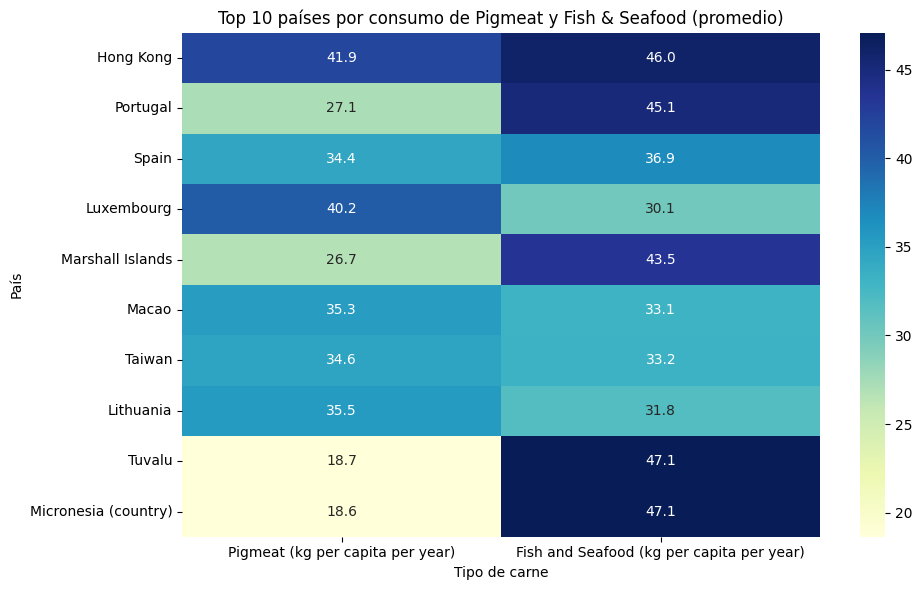

In [ ]:
# Gráfico 1: perfil de consumo de las carnes seleccionadas de los países más consumidores
# carnes seleccionadas
selected_meats = ['Pigmeat (kg per capita per year)', 'Fish and Seafood (kg per capita per year)']
df_selected = df_data[['Entity'] + selected_meats]

# agrupar por país y calcular el promedio
df_grouped = df_selected.groupby('Entity')[selected_meats].mean()

# mostrar los 10 países con mayor consumo total en estas carnes
top10 = df_grouped.sum(axis=1).sort_values(ascending=False).head(10).index
df_top10 = df_grouped.loc[top10]

# Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(df_top10, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Top 10 países por consumo de Pigmeat y Fish & Seafood (promedio)")
plt.xlabel("Tipo de carne")
plt.ylabel("País")
plt.tight_layout()
plt.show()

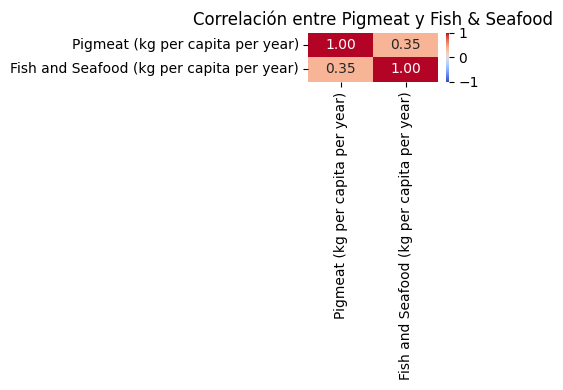

In [ ]:
# Gráfico 2: correlaciones entre las carnes seleccionadas
correlation_matrix = df_data[selected_meats].corr()

# Heatmap de correlación
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlación entre Pigmeat y Fish & Seafood")
plt.tight_layout()
plt.show()

**Hallazgos clave previos a implementacion de modelado:**

* Hong Kong presenta los niveles más altos per cápita tanto de carne porcina como de productos del mar, mientras que Micronesia y Tuvalu se distinguen por un consumo elevado de pescado y bajo de carne de cerdo. Estos casos reflejan diferencias culturales y geográficas en las preferencias alimentarias.

* Existe una ligera correlación positiva entre el consumo de Pigmeat y de productos del mar, lo que sugiere que en algunos países ambos tienden a aumentar juntos, aunque no necesariamente de forma consistente.


---

# Implementación de K-Means y DBSCAN

* K-Means (con k=3):

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df_data['Cluster_KMeans'] = labels

Visualizar Clusteres

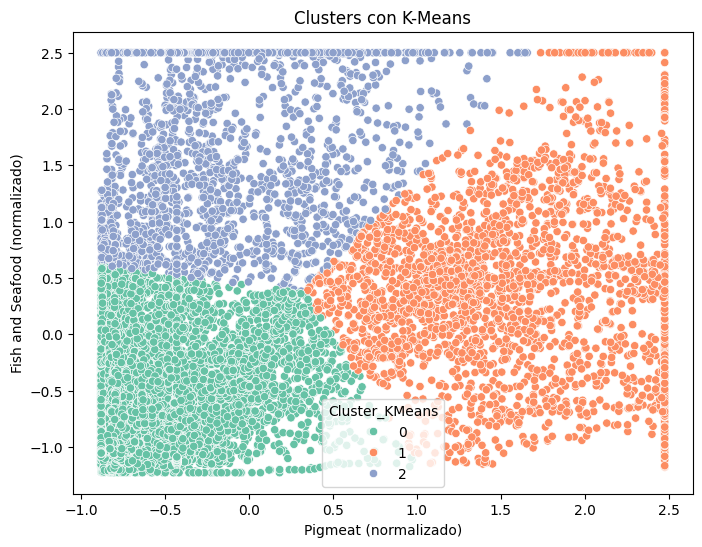

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled[:,0], y=X_scaled[:,1],
    hue=df_data['Cluster_KMeans'], palette='Set2'
)
plt.xlabel('Pigmeat (normalizado)')
plt.ylabel('Fish and Seafood (normalizado)')
plt.title('Clusters con K-Means')
plt.show()

* DBSCAN:

Resumen de clusters encontrados:
Nombre_Cluster
Cluster_0     12572
Cluster_7       114
Noise            51
Cluster_8        37
Cluster_4        27
Cluster_5        25
Cluster_10       15
Cluster_9         7
Cluster_1         7
Cluster_2         5
Cluster_3         5
Cluster_11        5
Cluster_6         4
Cluster_12        3
Name: count, dtype: int64

Resumen de tipos de punto:
Tipo_Punto
Core        12733
Boundary       93
Noise          51
Name: count, dtype: int64


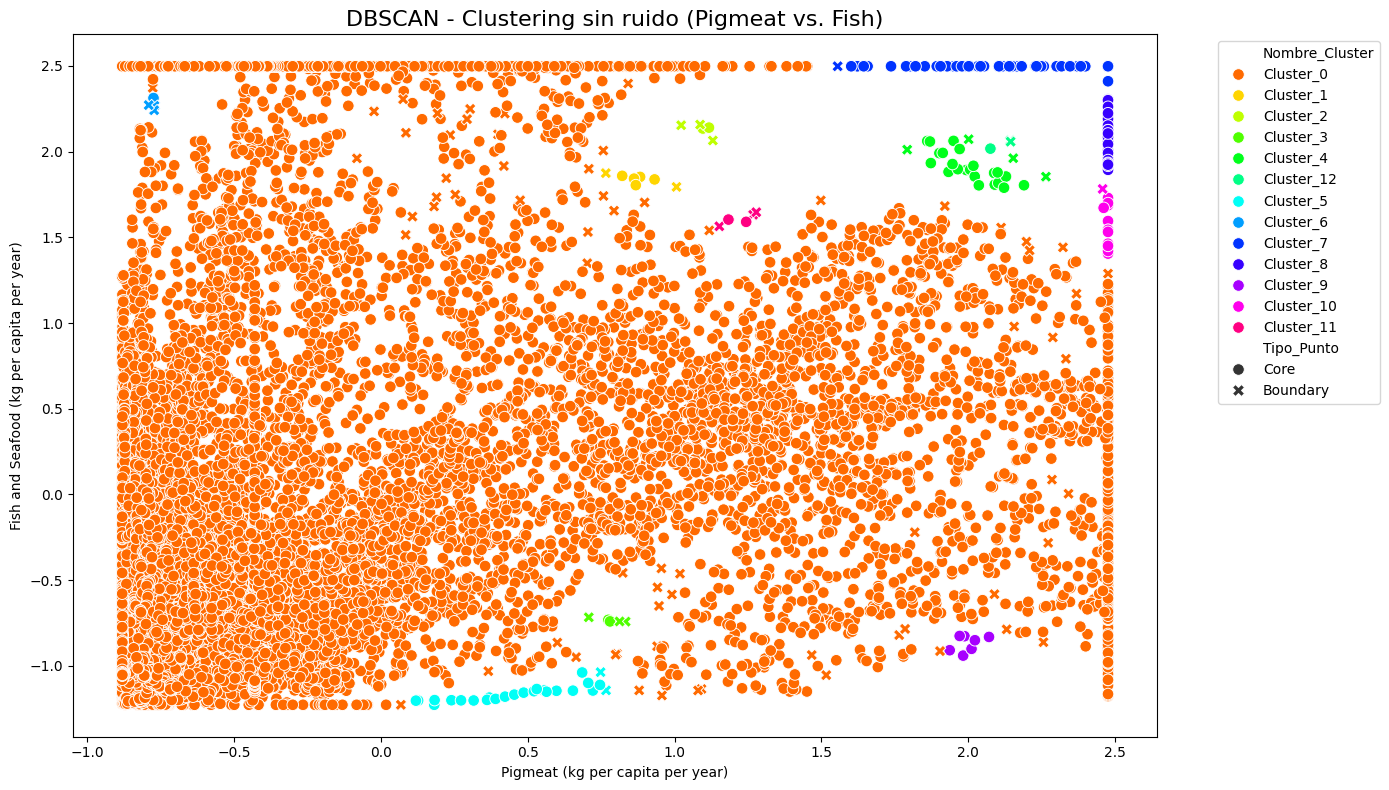

In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Copia de X_scaled (asegúrate de que X_scaled ya esté definido antes)
x_scaled1 = X_scaled

# Nombres REALES de las columnas usadas en X_scaled
col_x = 'Pigmeat (kg per capita per year)'
col_y = 'Fish and Seafood (kg per capita per year)'

# 2. Aplicar DBSCAN (determinista, no cambia entre ejecuciones)
eps = 0.1
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(x_scaled1)

labels1 = dbscan.labels_

# 3. Clasificar puntos: Core, Boundary, Noise
core_samples_mask = np.zeros_like(labels1, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

tipo_punto = np.array(['Boundary'] * len(labels1))
tipo_punto[labels1 == -1] = 'Noise'
tipo_punto[core_samples_mask] = 'Core'

# 4. Asignar nombres a los clusters
nombre_clusters = np.array([f"Cluster_{label}" if label != -1 else "Noise" for label in labels1])

# 5. Crear DataFrame resultado
df_resultado = pd.DataFrame({
    col_x: x_scaled1[:, 0],
    col_y: x_scaled1[:, 1],
    'Cluster': labels1,
    'Nombre_Cluster': nombre_clusters,
    'Tipo_Punto': tipo_punto
})

# 6. Mostrar resumen
print("Resumen de clusters encontrados:")
print(df_resultado['Nombre_Cluster'].value_counts())
print("\nResumen de tipos de punto:")
print(df_resultado['Tipo_Punto'].value_counts())

# 7. Eliminar puntos de ruido del DataFrame para graficar
df_filtrado = df_resultado[df_resultado['Tipo_Punto'] != 'Noise'].copy()

# 8. Recalcular la paleta de colores solo para los clusters sin ruido
clusters_unicos = df_filtrado['Nombre_Cluster'].unique()
palette = sns.color_palette("hsv", len(clusters_unicos))

# 9. Visualización sin ruido y con gráfico más grande
plt.figure(figsize=(14, 8))  # Tamaño aumentado del gráfico

sns.scatterplot(
    data=df_filtrado,
    x=col_x,
    y=col_y,
    hue='Nombre_Cluster',
    style='Tipo_Punto',
    palette=palette,
    s=70  # Tamaño de punto más grande
)

plt.title("DBSCAN - Clustering sin ruido (Pigmeat vs. Fish)", fontsize=16)
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

---

# Comparación de rendimiento

**1) Para K-MEANS:**

* Calcular inercias y aplicar Regla del codo para buscar nuevos valores de k que sean mejores:

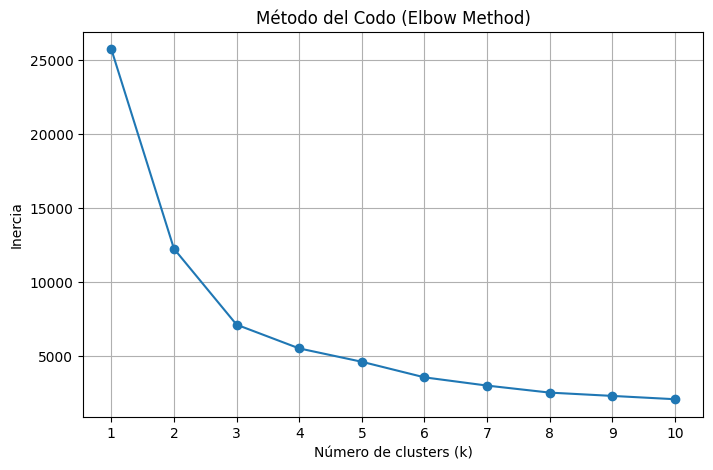

In [ ]:
# Probar diferentes valores de k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans_prueba = KMeans(n_clusters=k, random_state=42)
    kmeans_prueba.fit(X_scaled)
    inertias.append(kmeans_prueba.inertia_)

# gráfico del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo (Elbow Method)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

Se evidencia que K=3 es un buen punto para la agrupación

* Puntuación de silueta:

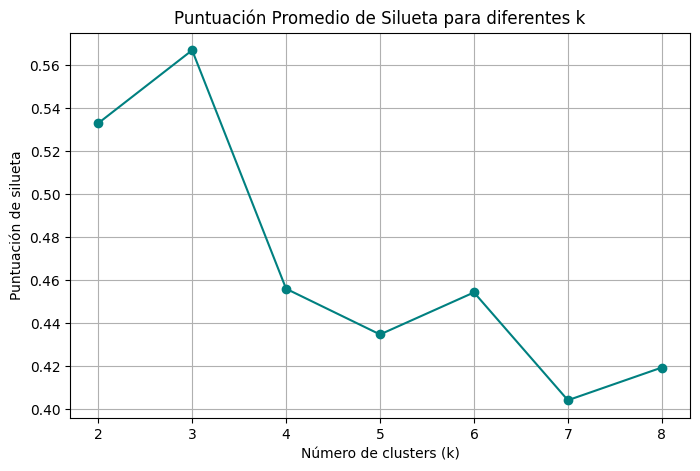

In [ ]:
from sklearn.metrics import silhouette_score
range_k = range(2, 9)
silhouette_scores = []

for k in range_k:
    kmeans_silueta = KMeans(n_clusters=k, random_state=42)
    labels_silueta = kmeans_silueta.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels_silueta)
    silhouette_scores.append(score)

# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker='o', color='teal')
plt.xticks(range_k)
plt.title("Puntuación Promedio de Silueta para diferentes k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Puntuación de silueta")
plt.grid(True)
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Puntuación de silueta para k=3: {silhouette_avg:.4f}")

Puntuación de silueta para k=3: 0.5670


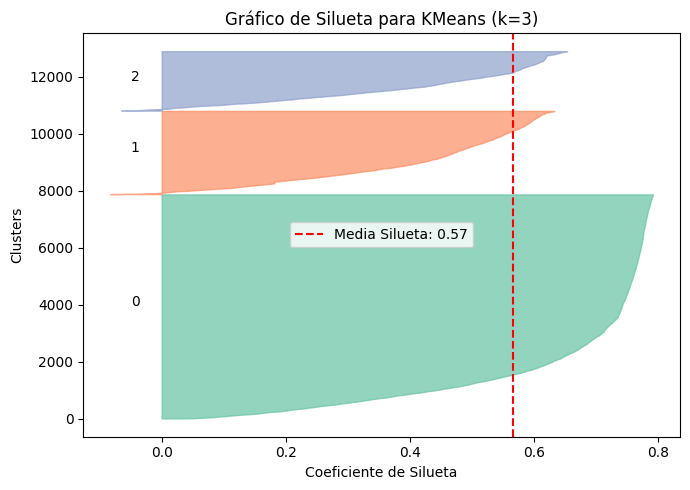

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_vals = silhouette_samples(X_scaled, labels)

# Gráfico de silueta
fig, ax = plt.subplots(figsize=(7, 5))
y_lower = 10
for i in range(3):  # k=3
    cluster_vals = silhouette_vals[labels == i]
    cluster_vals.sort()
    size_cluster = cluster_vals.shape[0]
    y_upper = y_lower + size_cluster
    color = plt.cm.Set2(i)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10

ax.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Media Silueta: {silhouette_avg:.2f}")
ax.set_title("Gráfico de Silueta para KMeans (k=3)")
ax.set_xlabel("Coeficiente de Silueta")
ax.set_ylabel("Clusters")
ax.legend()
plt.tight_layout()
plt.show()

Ambos gráficos muestran que los clusters con k=3 están bien definidos: tienen formas claras, pocos valores negativos y una media de silueta de 0.57 aproximadamente, además de tener el puntaje de silueta más alto en comparación a otros valores de k, lo cual indica una buena separación general entre grupos.

**2) Para DBSCAN:**

* Puntuación de silueta:

In [ ]:
from sklearn.metrics import silhouette_score

# Filtrar los puntos que NO son ruido
mask_no_noise = labels1 != -1
X_validos = x_scaled1[mask_no_noise]
labels_validos = labels1[mask_no_noise]

# Verificar que haya al menos 2 clusters válidos para poder calcular la silueta
n_clusters_validos = len(np.unique(labels_validos))

if n_clusters_validos >= 2:
    score = silhouette_score(X_validos, labels_validos)
    print(f"Puntuación de silueta (sin incluir ruido): {score:.4f}")
else:
    print("No se puede calcular la silueta: hay menos de 2 clusters válidos.")


Puntuación de silueta (sin incluir ruido): -0.2278


---

La puntuación de silueta fue de -0.2278, lo que indica que los clusters no están perfectamente separados, pero eso era esperable por la cantidad y forma de los datos. Aun así, la elección de parámetros que usé fue adecuada para este contexto, y más adelante se podrá ver cómo eso ayuda a interpretar mejor la estructura real del conjunto.

# Comparación estrategias de inicialización de K-Means

1.   **KMeans++**

In [ ]:
import time

start = time.time()
kmeans_plus = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels_plus = kmeans_plus.fit_predict(X_scaled)
tiempo_plus = time.time() - start
silueta_plus = silhouette_score(X_scaled, labels_plus)

print(f"KMeans++ → Silueta: {silueta_plus:.4f}, Tiempo: {tiempo_plus:.4f} s")

KMeans++ → Silueta: 0.5670, Tiempo: 0.0146 s


2.   **Random**

In [ ]:
start = time.time()
kmeans_random = KMeans(n_clusters=3, init='random', random_state=42)
labels_random = kmeans_random.fit_predict(X_scaled)
tiempo_random = time.time() - start
silueta_random = silhouette_score(X_scaled, labels_random)

print(f"KMeans Aleatorio → Silueta: {silueta_random:.4f}, Tiempo: {tiempo_random:.4f} s")

KMeans Aleatorio → Silueta: 0.5679, Tiempo: 0.0466 s


3.   **MiniBatchKMeans**

In [ ]:
from sklearn.cluster import MiniBatchKMeans

start = time.time()
mini_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
labels_mini = mini_kmeans.fit_predict(X_scaled)
tiempo_mini = time.time() - start
silueta_mini = silhouette_score(X_scaled, labels_mini)

print(f"MiniBatchKMeans → Silueta: {silueta_mini:.4f}, Tiempo: {tiempo_mini:.4f} s")

MiniBatchKMeans → Silueta: 0.5589, Tiempo: 0.0061 s


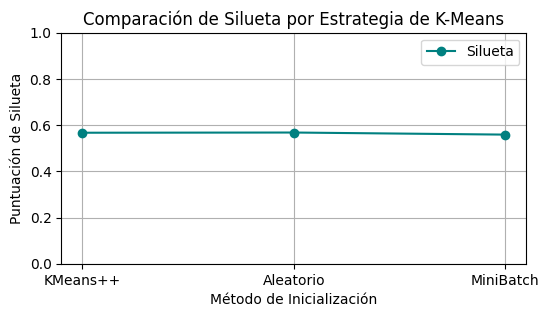

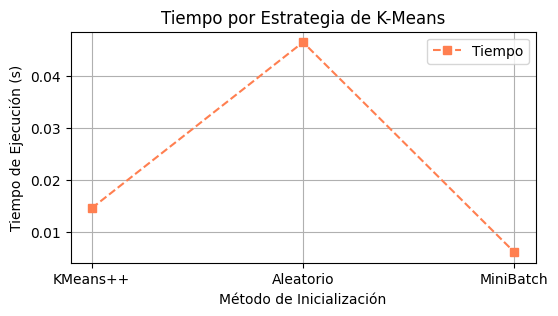

In [ ]:
resultados = pd.DataFrame({
    'Método': ['KMeans++', 'Aleatorio', 'MiniBatch'],
    'Silueta': [silueta_plus, silueta_random, silueta_mini],
    'Tiempo (s)': [tiempo_plus, tiempo_random, tiempo_mini]
})

# grafico de silueta
plt.figure(figsize=(6, 3))
plt.plot(resultados['Método'], resultados['Silueta'], marker='o', linestyle='-', color='teal', label='Silueta')
plt.xlabel('Método de Inicialización')
plt.ylabel('Puntuación de Silueta')
plt.title('Comparación de Silueta por Estrategia de K-Means')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

# grafico de tiempo
plt.figure(figsize=(6, 3))
plt.plot(resultados['Método'], resultados['Tiempo (s)'], marker='s', linestyle='--', color='coral', label='Tiempo')
plt.xlabel('Método de Inicialización')
plt.ylabel('Tiempo de Ejecución (s)')
plt.title('Tiempo por Estrategia de K-Means')
plt.grid(True)
plt.legend()
plt.show()

Interpretación:

- KMeans++ obtuvo una silueta similar a la original (0.5670), con tiempo bajo (0.0146 s) y buena estabilidad. Este demostró ser la estrategia de inicialización más equilibrada.

- KMeans Aleatorio logró la mejor silueta (0.5679), pero fue el más lento (0.0466 s) debido al posible aumento de iteraciones. Esta es la mejor estrategia obtenida con el mejor puntaje de silueta, ya que aunque tiene el mayor tiempo de las 3 estrategias, sigue siendo un tiempo bajo.

- MiniBatchKMeans fue el más rápido (0.0061 s), aunque con la silueta más baja (0.5589), lo que implica una leve pérdida de calidad.

# Comparación de hiperparámetros para DBSCAN

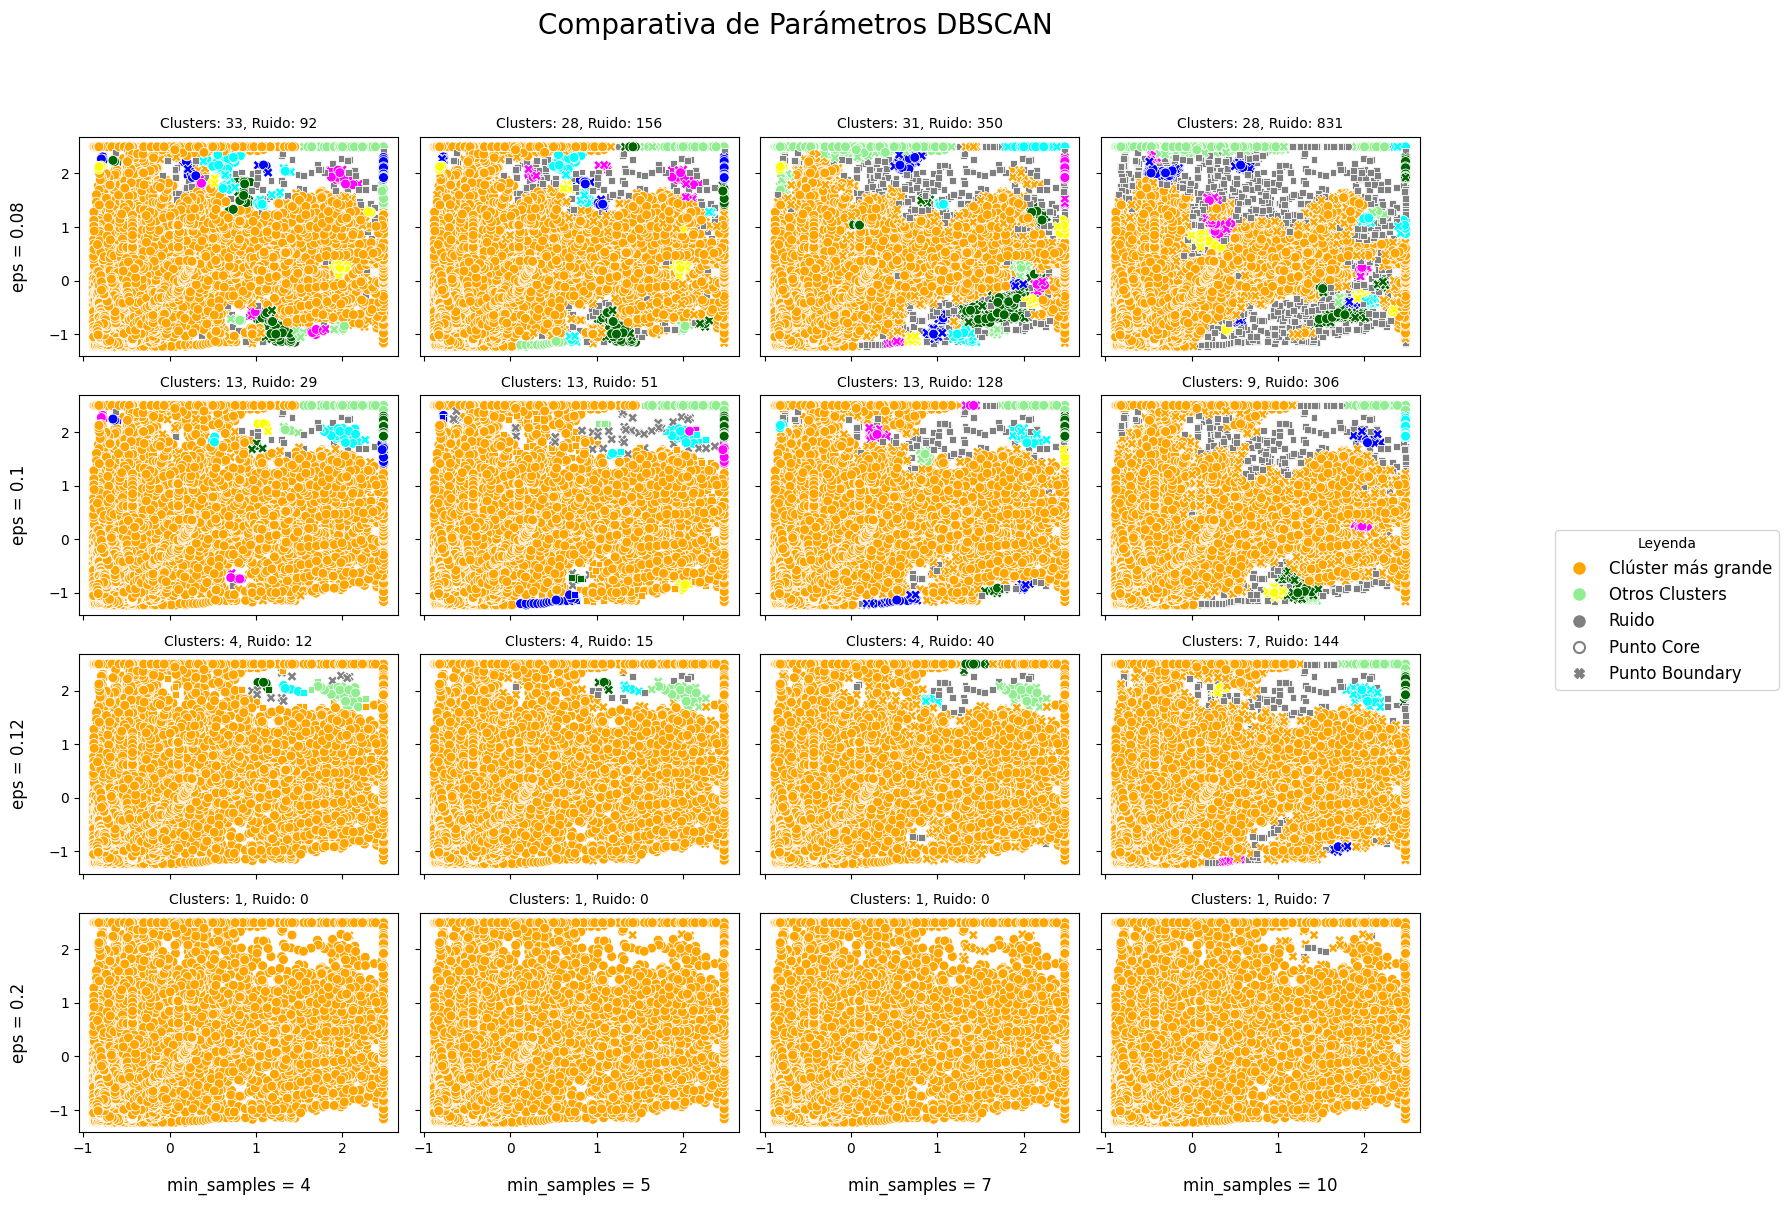

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

col_x = 'Pigmeat (kg per capita per year)'
col_y = 'Fish and Seafood (kg per capita per year)'

def run_and_plot_dbscan(ax, data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels2 = dbscan.fit_predict(data)

    tipo_punto = np.full(len(labels2), 'Boundary', dtype=object)
    tipo_punto[labels2 == -1] = 'Noise'
    if dbscan.core_sample_indices_.size > 0:
        tipo_punto[dbscan.core_sample_indices_] = 'Core'

    df_resultado = pd.DataFrame(data, columns=[col_x, col_y])
    df_resultado['label'] = labels2
    df_resultado['Tipo_Punto'] = tipo_punto
    df_resultado['Cluster'] = [f'Cluster {l}' if l != -1 else 'Ruido' for l in labels2]

    palette = {}
    cluster_labels = [l for l in np.unique(labels2) if l != -1]

    custom_colors = [
        '#FFA500',
        '#90EE90',
        '#006400',
        '#00FFFF',
        '#0000FF',
        '#FF00FF',
        '#FFFF00',
    ]

    if cluster_labels:
        counts = pd.Series(labels2[labels2 != -1]).value_counts()

        color_map = {label: custom_colors[(i + 1) % len(custom_colors)] for i, label in enumerate(counts.index[1:])}
        color_map[counts.index[0]] = custom_colors[0]

        for label_num, color in color_map.items():
            palette[f'Cluster {label_num}'] = color

    palette['Ruido'] = '#808080'

    sns.scatterplot(
        ax=ax,
        data=df_resultado,
        x=col_x,
        y=col_y,
        hue='Cluster',
        style='Tipo_Punto',
        palette=palette,
        s=50,
        legend=False
    )

    n_clusters = len(cluster_labels)
    n_noise = np.sum(labels2 == -1)
    ax.set_title(f'Clusters: {n_clusters}, Ruido: {n_noise}', fontsize=10)

epsilon_values = [0.08, 0.1, 0.12, 0.2]
min_samples_values = [4, 5, 7, 10]

fig, axes = plt.subplots(
    len(epsilon_values),
    len(min_samples_values),
    figsize=(16, 12),
    sharex=True,
    sharey=True
)
fig.suptitle('Comparativa de Parámetros DBSCAN', fontsize=20, y=1.0)

for i, eps in enumerate(epsilon_values):
    for j, samples in enumerate(min_samples_values):
        ax = axes[i, j]
        run_and_plot_dbscan(ax, x_scaled1, eps=eps, min_samples=samples)

        if j == 0:
            ax.set_ylabel(f'eps = {eps}', fontsize=12, labelpad=15)
        if i == len(epsilon_values) - 1:
            ax.set_xlabel(f'min_samples = {samples}', fontsize=12, labelpad=15)

handles = [
    plt.Line2D([0], [0], marker='o', color='#FFA500', linestyle='None', markersize=8),
    plt.Line2D([0], [0], marker='o', color='#90EE90', linestyle='None', markersize=8),
    plt.Line2D([0], [0], marker='o', color='#808080', linestyle='None', markersize=8),
    plt.Line2D([0], [0], marker='o', color='grey', linestyle='None', markersize=8, fillstyle='none', markeredgewidth=1.5),
    plt.Line2D([0], [0], marker='X', color='grey', linestyle='None', markersize=7)
]
labels2 = [
    'Clúster más grande',
    'Otros Clusters',
    'Ruido',
    'Punto Core',
    'Punto Boundary'
]
fig.legend(handles, labels2, loc='center right', bbox_to_anchor=(1.12, 0.5), fontsize=12, title="Leyenda")

plt.tight_layout(rect=[0, 0, 0.9, 0.96])
plt.show()

La opción elegida previamente utilizada fue:
(epsilon=0.1 y samples=5)


 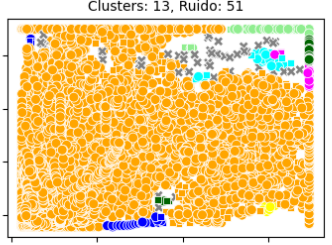

Se eligió la opción de 0.1 de epsilon y de 5 de samples principalmente debido a que las otras opciones fallan o se vuelven demasiado sensibles y generan un exceso de "ruido", o son tan generales que fusionan todos los datos en un único grupo, perdiendo los detalles importantes, en cambio esta opción mantiene el balance adecuado para la gran cantidad de datos.

# Visualización e Interpretación de clústeres

###Kmeans

- K-means + estrategia de inicializacion Aleatorio (con k=3)

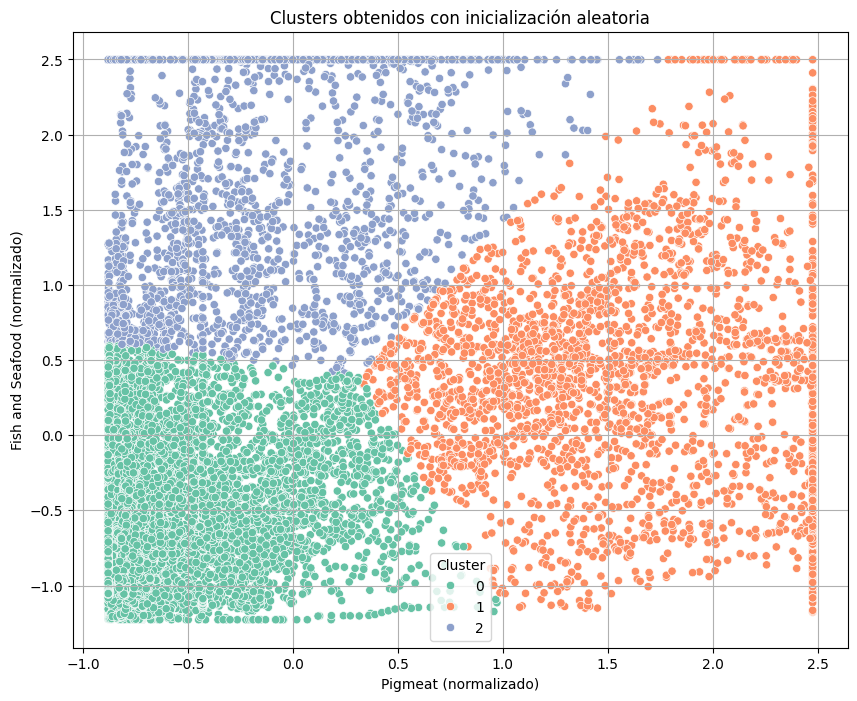

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x=X_scaled[:,0], y=X_scaled[:,1],
    hue=labels_random, palette='Set2'
)
plt.xlabel('Pigmeat (normalizado)')
plt.ylabel('Fish and Seafood (normalizado)')
plt.title('Clusters obtenidos con inicialización aleatoria')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

La segmentación obtenida mediante KMeans con inicialización aleatoria muestra una distribución clara en tres grupos sobre las variables normalizadas de consumo de Pigmeat y Fish and Seafood.

- El cluster 0 (verde) agrupa observaciones con bajos niveles en ambas variables.
- El cluster 1 (naranja) concentra valores elevados en Pigmeat.
- El cluster 2 (azul) se caracteriza por un mayor consumo de productos del mar.

Esta separación visual es coherente con la puntuación de silueta obtenida (0.5679), lo que indica una agrupación razonablemente estructurada, aunque no completamente óptima.

Cluster
0    7882
1    2939
2    2056
Name: count, dtype: int64


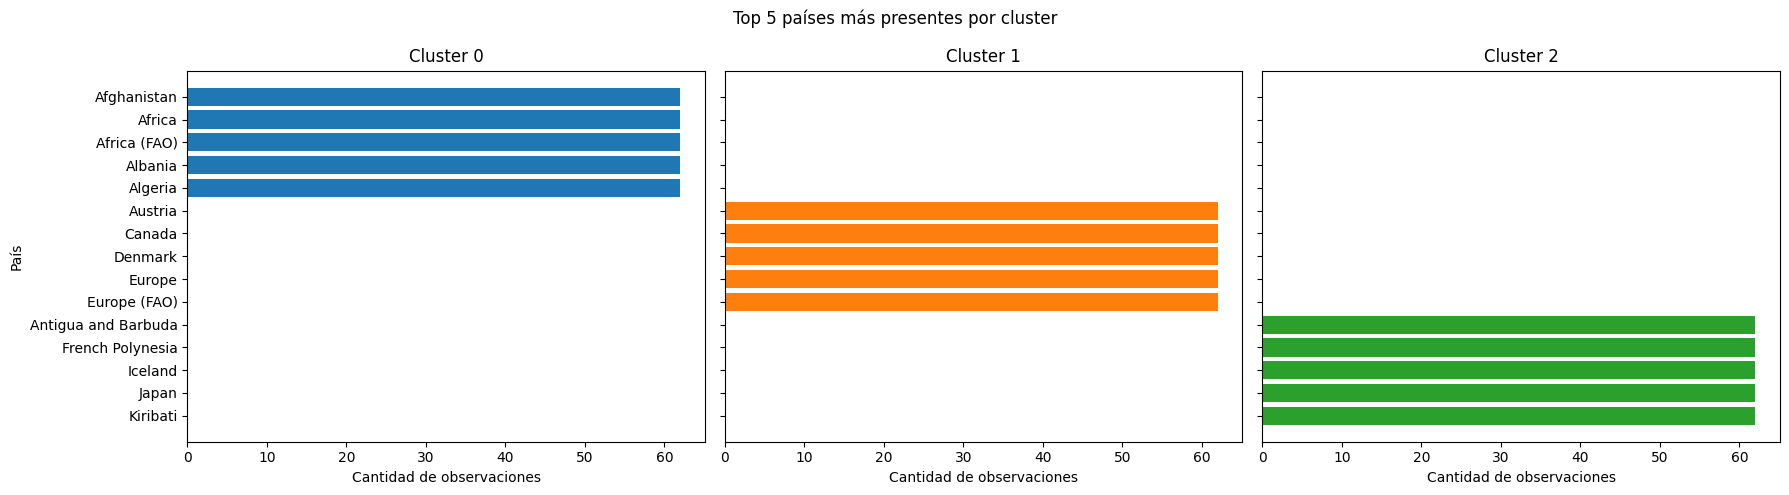

In [ ]:
df_data['Cluster'] = labels_random
print(df_data['Cluster'].value_counts())

top_paises_cluster = (
    df_data.groupby(['Cluster', 'Entity'])
    .size()
    .reset_index(name='conteo')
    .sort_values(['Cluster', 'conteo'], ascending=[True, False])
)

fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

for i in range(3):
    top5 = top_paises_cluster[top_paises_cluster['Cluster'] == i].head(5)
    axes[i].barh(top5['Entity'], top5['conteo'], color='C'+str(i))
    axes[i].set_title(f'Cluster {i}')
    axes[i].invert_yaxis()
    axes[i].set_xlabel('Cantidad de observaciones')
    axes[i].set_ylabel('País' if i == 0 else '')

plt.suptitle('Top 5 países más presentes por cluster')
plt.tight_layout()
plt.show()

Análisis geográfico-cultural de los clusters:

- Cluster 0 concentra países como Afghanistan, Africa (FAO), Albania y Algeria, lo que podría vincularse a contextos con menores niveles de consumo de Pigmeat y productos del mar. Estas características podrían deberse a factores económicos, religiosos o de disponibilidad local de alimentos.

- Cluster 1 está dominado por países como Austria, Canadá, Dinamarca y regiones europeas agregadas (Europe, Europe (FAO)), lo que sugiere una fuerte presencia de culturas con alto consumo de carne porcina, típicas de Europa Central y del Norte.

- Cluster 2 destaca por la representación de países insulares y costeros como Iceland, Japan, French Polynesia y Kiribati, cuyas tradiciones alimentarias están claramente asociadas al mar. Esto resulta coherente con el perfil del cluster que presentó un mayor consumo de productos del mar en análisis anteriores.

### DBSCAN

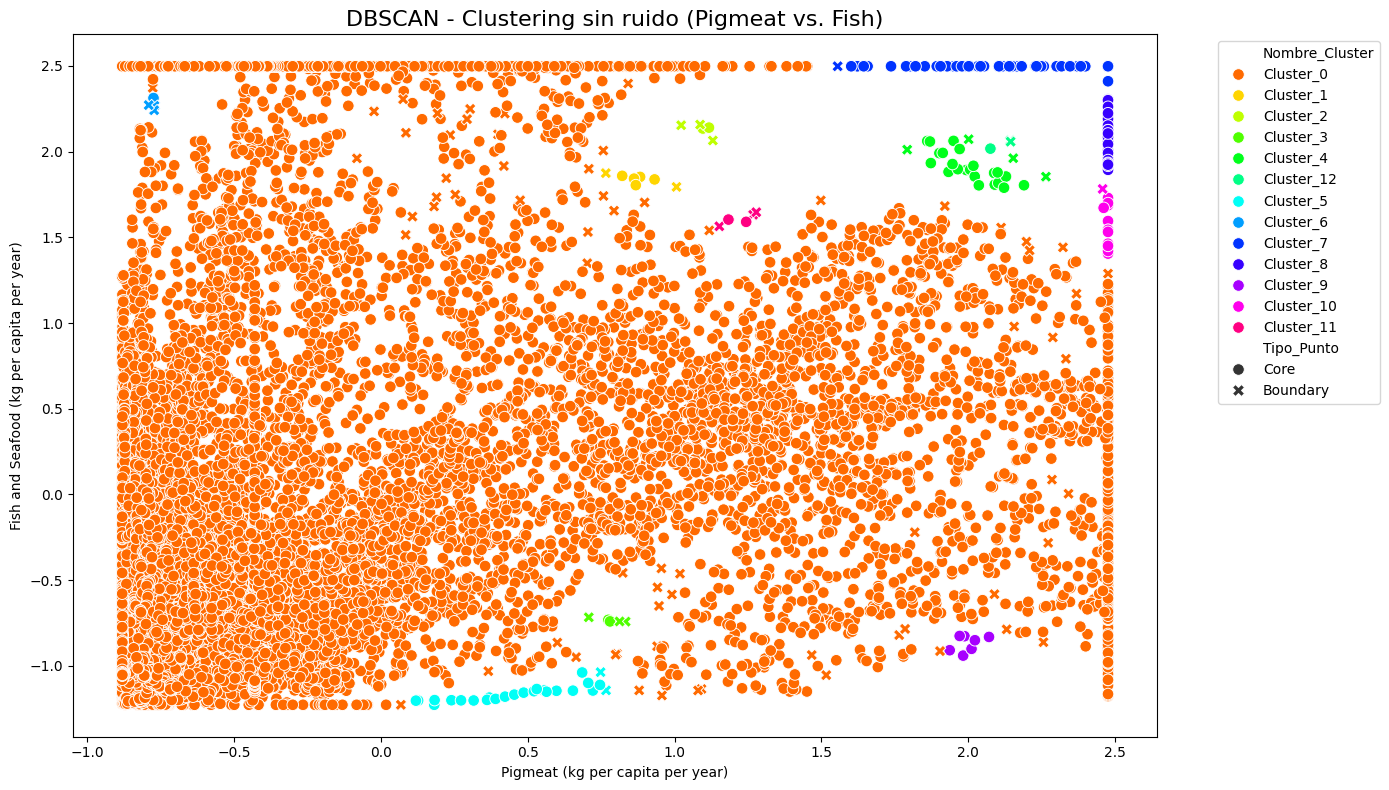

In [ ]:
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=df_filtrado,
    x=col_x,
    y=col_y,
    hue='Nombre_Cluster',
    style='Tipo_Punto',
    palette=palette,
    s=70
)

plt.title("DBSCAN - Clustering sin ruido (Pigmeat vs. Fish)", fontsize=16)
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

La segmentación lograda con DBSCAN permitió identificar varios grupos más específicos en torno al consumo de Pigmeat y productos del mar. El clúster principal (naranja) agrupa la mayoría de los puntos, indicando un patrón general de consumo. Los demás clústeres, más pequeños y dispersos, reflejan grupos con características particulares.

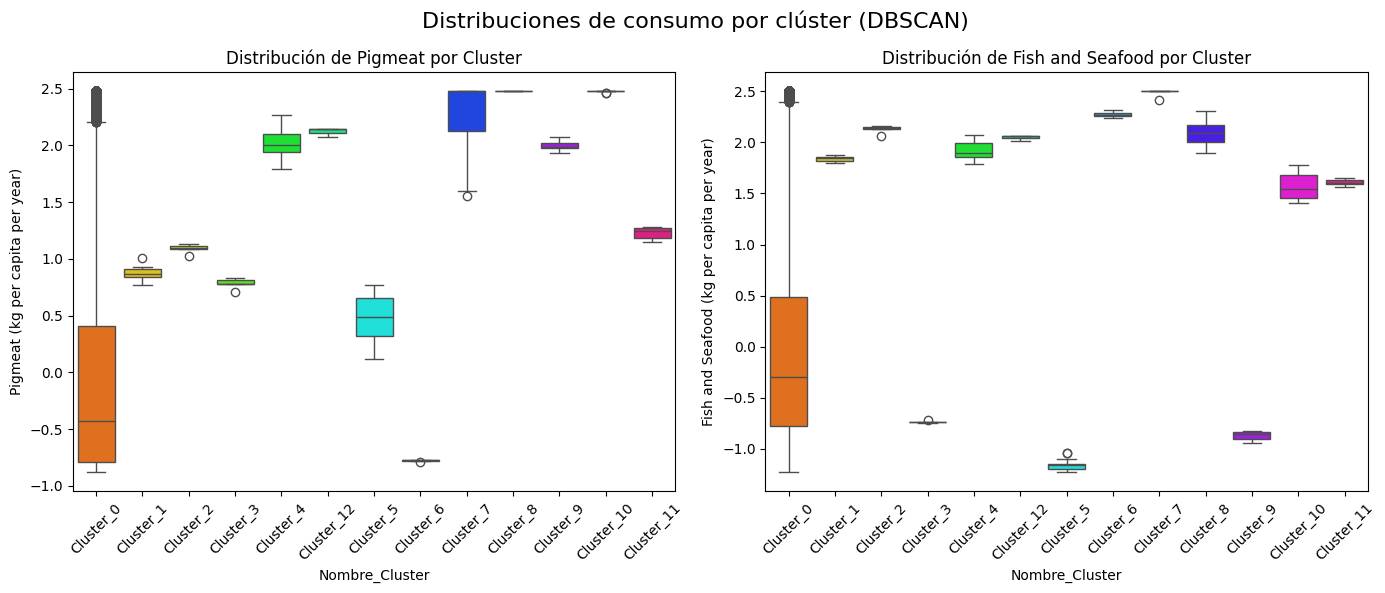

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usar solo puntos que no son ruido
df_filtrado = df_resultado[df_resultado['Tipo_Punto'] != 'Noise'].copy()

# Crear figura de boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot para Pigmeat
sns.boxplot(
    data=df_filtrado,
    x='Nombre_Cluster',
    y=col_x,
    hue='Nombre_Cluster',
    ax=axes[0],
    palette='hsv',
    legend=False
)
axes[0].set_title('Distribución de Pigmeat por Cluster')
axes[0].set_ylabel('Pigmeat (kg per capita per year)')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot para Fish and Seafood
sns.boxplot(
    data=df_filtrado,
    x='Nombre_Cluster',
    y=col_y,
    hue='Nombre_Cluster',
    ax=axes[1],
    palette='hsv',
    legend=False
)
axes[1].set_title('Distribución de Fish and Seafood por Cluster')
axes[1].set_ylabel('Fish and Seafood (kg per capita per year)')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Distribuciones de consumo por clúster (DBSCAN)', fontsize=16)
plt.tight_layout()
plt.show()

La segmentación obtenida con DBSCAN (ε = 0.1, min_samples = 5) permitió identificar agrupaciones más naturales en torno al consumo de carne de cerdo y productos del mar. A diferencia de métodos como KMeans, DBSCAN no obliga a definir un número fijo de grupos, lo que ayuda a detectar patrones más realistas y complejos.

* El Cluster 0 (naranja) es el más amplio y diverso, reuniendo observaciones con consumos bajos o moderados en ambas categorías. En contraste, los Clusters 6 y 7 agrupan perfiles con alto consumo en ambas variables, probablemente regiones con dietas ricas en proteínas animales.

* Algunos clústeres como el 2, 3 y 4 muestran preferencias claras por uno de los alimentos, mientras que otros como el 5 y 9 reflejan comportamientos más extremos o particulares.

En conjunto, DBSCAN logró una segmentación rica en matices, revelando hábitos de consumo que no habrían sido tan evidentes con métodos más rígidos.